<h2>Cab Drives EDA</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")
import warnings
import datetime
warnings.filterwarnings('ignore')
import itertools

In [85]:
df =pd.read_csv("trips_data.csv")

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  554 non-null    int64  
 1   Product Type          551 non-null    object 
 2   Trip or Order Status  554 non-null    object 
 3   Request Time          554 non-null    object 
 4   Begin Trip Time       554 non-null    object 
 5   Begin Trip Lat        525 non-null    float64
 6   Begin Trip Lng        525 non-null    float64
 7   Dropoff Time          554 non-null    object 
 8   Dropoff Lat           525 non-null    float64
 9   Dropoff Lng           525 non-null    float64
 10  Distance (miles)      554 non-null    float64
 11  Fare Amount           554 non-null    float64
 12  Fare Currency         551 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 56.4+ KB


<strong>Missing Values</strong>

In [87]:
missing_df=pd.DataFrame(df.isna().sum()/df.count()*100).reset_index().rename(columns={"index":"columns",0:"missing values(%)"})
missing_df[missing_df["missing values(%)"]>=5]

,columns,missing values(%)
5,Begin Trip Lat,5.52381
6,Begin Trip Lng,5.52381
8,Dropoff Lat,5.52381
9,Dropoff Lng,5.52381


<strong>No Duplicate Records</strong>

In [88]:
df.duplicated().sum()

0

In [89]:
df.describe()

,City,Begin Trip Lat,Begin Trip Lng,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount
count,554.00000,525.000000,525.000000,525.000000,525.000000,554.000000,554.000000
mean,473.51444,-23.560695,-46.622412,-23.567343,-46.615599,4.047473,16.280361
std,125.84521,0.069152,0.240816,0.070309,0.241447,3.752974,12.445731
min,296.00000,-23.975843,-46.837136,-23.975838,-46.837120,0.000000,0.000000
25%,458.00000,-23.602633,-46.666376,-23.611162,-46.666338,1.180000,7.872500
50%,458.00000,-23.559450,-46.644786,-23.568158,-46.637291,3.275000,15.100000
75%,458.00000,-23.503640,-46.624974,-23.507593,-46.623503,6.020000,24.682500
max,1449.00000,-22.903051,-43.105089,-22.902098,-43.114359,19.740000,95.400000


In [90]:
df.dropna(inplace=True)

<strong>Data Preprocessing</strong>

In [91]:
df["Request Time"]=df["Request Time"].str.replace("UTC"," ")
df["Begin Trip Time"]=df["Begin Trip Time"].str.replace("UTC"," ")
df["Dropoff Time"]=df["Dropoff Time"].str.replace("UTC"," ")
df["Dropoff Time"]=pd.to_datetime(df["Dropoff Time"])
df["Request Time"] = pd.to_datetime(df["Request Time"],utc=True)
df["Begin Trip Time"] = pd.to_datetime(df["Begin Trip Time"],utc=True)

In [92]:
df["Request Date"] = df["Request Time"].dt.date
df["Request Month"] = df["Request Time"].dt.month
df["Request Day"] = df["Request Time"].dt.day_name()
df["Request Month Name"] = df["Request Time"].dt.month_name()

In [93]:
df["Souce Latlng"]=df["Begin Trip Lat"].astype(str)+","+df["Begin Trip Lng"].astype(str)
df["Dest Latlng"]=df["Dropoff Lat"].astype(str)+","+df["Dropoff Lng"].astype(str)

In [94]:
def get_address(latlng):
    location = geolocator.reverse(latlng)
    address = location.raw["display_name"]
    return address

In [96]:
# df["source"]=df["Souce Latlng"].apply(get_address)
# df["dest"]=df["Dest Latlng"].apply(get_address)

In [12]:
df["Ride Duration"]=(df["Dropoff Time"] - df["Begin Trip Time"])
df["Ride Duration"]=df["Ride Duration"].apply(lambda x: x.seconds/60).round()

In [13]:
def fix_product_case(text):
    if(text=="uberX" or text =="uberx"):
        return "UberX"
    elif(text=="POOL: MATCHED" or text=="Pool: MATCHED" or text=="Pool"):
        return "POOL"
    elif(text=="uberPOOL: MATCHED"):
        return "uberPOOL"
    else:
        return text

In [14]:
df["Product Type"]=df["Product Type"].apply(fix_product_case)

<strong>Trips</strong>

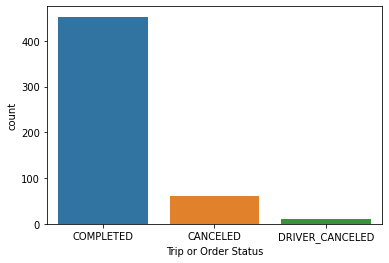

In [136]:
sns.countplot(x=df["Trip or Order Status"],data=df)
plt.show()

<strong>Trips By Product Type</strong>

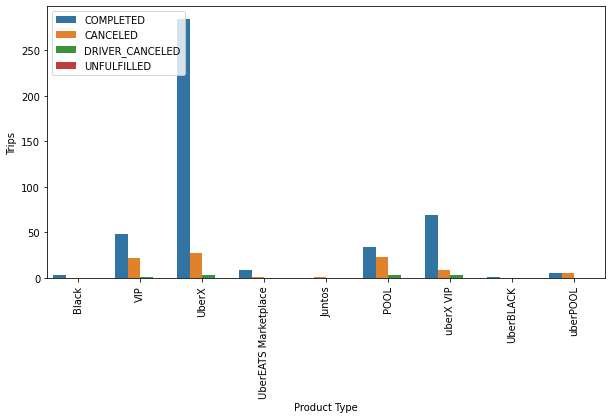

In [17]:
plt.subplots(figsize=(10,5))
sns.countplot(x=df["Product Type"],data=df, hue=df["Trip or Order Status"])
plt.xticks(rotation=90)
plt.ylabel("Trips")
plt.legend()
plt.show()

<strong>Trips Distance and Fare </strong>

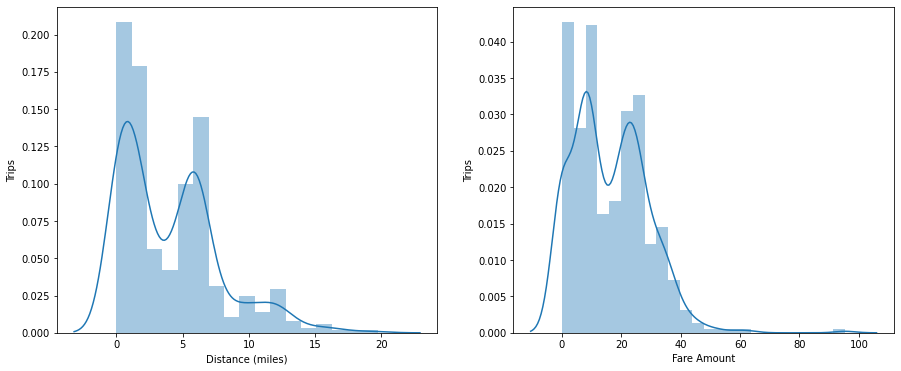

In [70]:
plt.figure(figsize=(15,6),)
plt.subplot(1,2,1)
sns.distplot(x=df["Distance (miles)"])
plt.ylabel("Trips")
plt.xlabel("Distance (miles)")
plt.subplot(1,2,2)
sns.distplot(x=df["Fare Amount"])
plt.ylabel("Trips")
plt.xlabel("Fare Amount")
plt.show()

<strong>Number of rides by Month</strong>

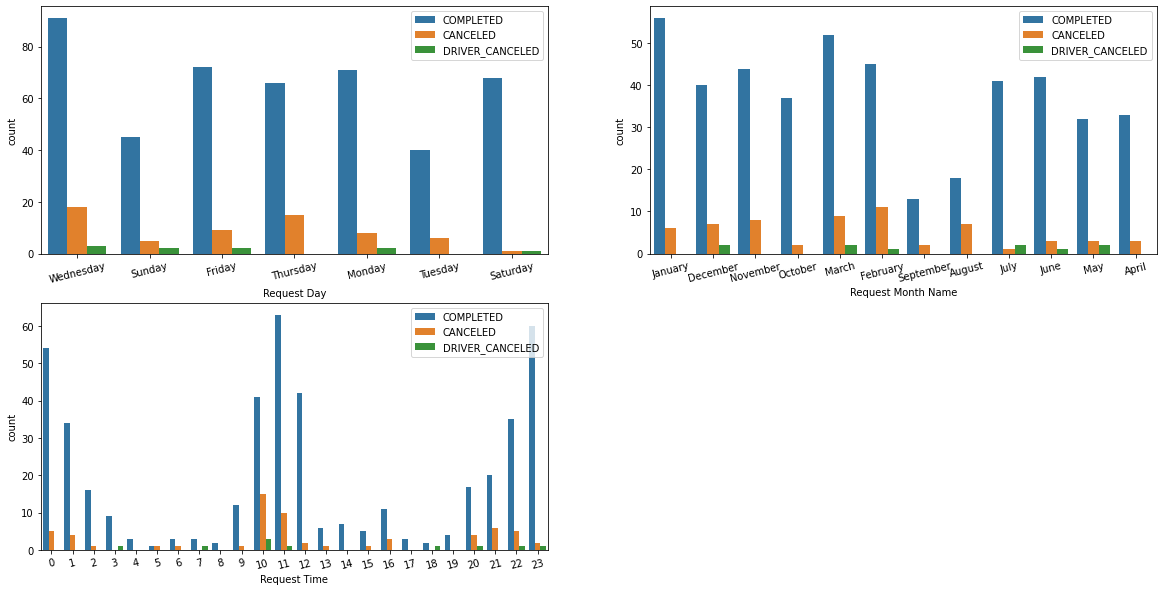

In [136]:
fig=plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x=df["Request Day"],data=df, hue=df["Trip or Order Status"])
plt.xticks(rotation=14)
plt.legend()
plt.subplot(2,2,2)
sns.countplot(x=df["Request Month Name"],data=df, hue=df["Trip or Order Status"])
plt.xticks(rotation=14)
plt.legend()
plt.subplot(2,2,3)
sns.countplot(x=df["Request Time"].dt.hour,data=df, hue=df["Trip or Order Status"])
plt.xticks(rotation=14)
plt.legend()
plt.show()

<strong>Average Ride Duration(Minuts)</strong>

In [86]:
df_avg_ride_duration=df.groupby("Product Type")["Ride Duration"].agg("mean").reset_index(name="avg ride duration").sort_values(by=["avg ride duration"],ascending=[False])

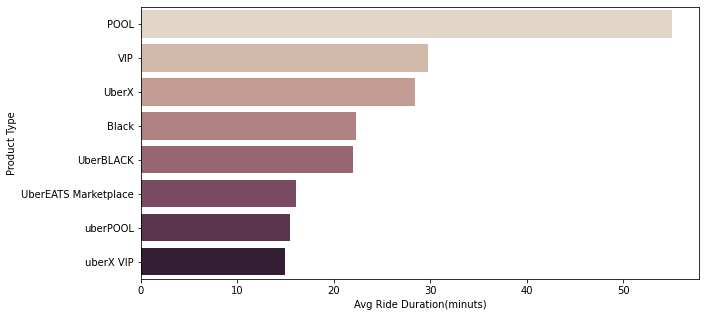

In [123]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.barplot(x="avg ride duration",y="Product Type",orient="h",palette="ch:.25",data=df_avg_ride_duration)
plt.xlabel("Avg Ride Duration(minuts)")
plt.show()

<strong>Diatance Vs Fare</strong>

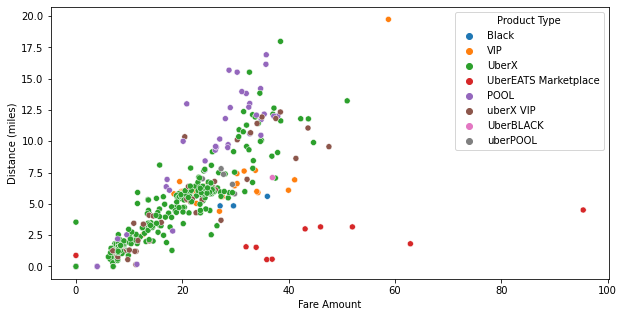

In [113]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.scatterplot(x="Fare Amount", y="Distance (miles)", hue="Product Type", markers=['o', '^', '*', '8', 's', 'p', 'd', 'v'],data=df);
plt.show()

<strong>Findings:</strong><br/>
1.UberEATS Marketplace has higher fare compared to other.

<strong>Fare Across all the Products</strong>

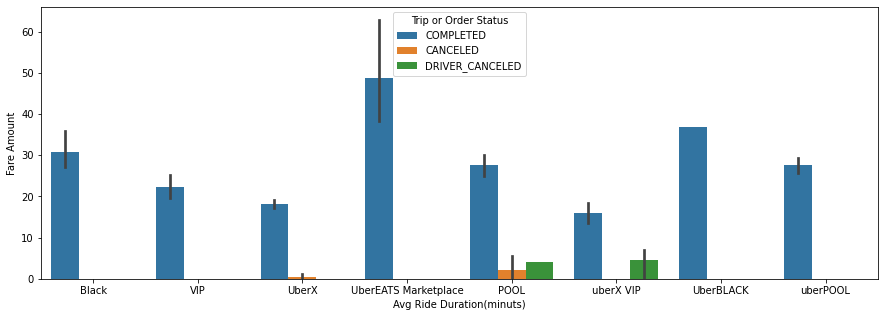

In [131]:
fig=plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
sns.barplot(x="Product Type",y="Fare Amount", hue="Trip or Order Status",data=df)
plt.xlabel("Avg Ride Duration(minuts)")
plt.show()

<strong>Distance covered across all the Products</strong>

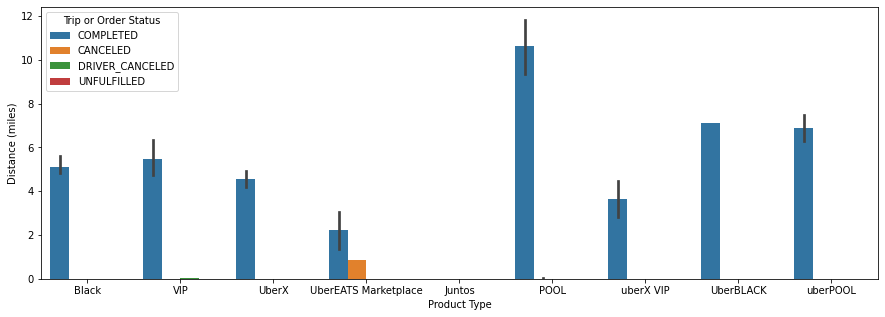

In [38]:
fig=plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
sns.barplot(x="Product Type",y="Distance (miles)", hue="Trip or Order Status",data=df)
plt.show()

<strong>Relation B/W Completed and cancelled trips</strong>

In [115]:
from scipy import stats
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel,f_oneway

H0 -> There is no relationship b/w completed and cancelled trips.<br/>
H1 -> There is singificant relationship b/w completed and cancelled trips.

In [130]:
df_anova = df[['Fare Amount','Trip or Order Status']]
grps = pd.unique(df["Trip or Order Status"].values)
d_data = {grp:df_anova['Fare Amount'][df_anova["Trip or Order Status"] == grp] for grp in grps}
F, p = stats.f_oneway(d_data['COMPLETED'], d_data['CANCELED'])

In [135]:
if(p<0.5):
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

Reject Null Hypothesis


<strong>Hence, There is no relation b/w completed and cancelled trips</strong>